<a href="https://colab.research.google.com/github/michalparuch/PAD-zadania-/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1



In [19]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

In [20]:
df = pd.read_csv('wyniki.csv')

In [21]:
df.head()

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10


In [41]:
from scipy import stats
import numpy as np

# Wczytanie danych z pliku
oceny_M = df[df["plec"] == "M"]["ocena_koncowa"]
oceny_F = df[df["plec"] == "F"]["ocena_koncowa"]

# Obliczenie średniej i odchylenia standardowego dla obu grup
srednia_M = (oceny_M).mean()
srednia_F = (oceny_F).mean()
odchylenie_M = (oceny_M).std()
odchylenie_F = (oceny_F).std()

# Obliczenie liczby próbek w obu grupach
n_M = len(oceny_M)
n_F = len(oceny_F)

# Obliczenie estymatora t-Studenta
t = (srednia_M - srednia_F) / np.sqrt((odchylenie_M**2 / n_M) + (odchylenie_F**2 / n_F))

# Obliczenie p-value
p = stats.t.sf(np.abs(t), n_M + n_F - 2) * 2

print(t)
print(p)
print('wniosek: Nie możemy odrzucić hipotezy zerowej')

1.9386213026002415
0.05333979815670125
wniosek: Nie możemy odrzucić hipotezy zerowej


#2

In [5]:
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('ZyskiFirmyX.csv')

In [3]:
df.head()

,Rok,Zysk
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


In [16]:
model = smf.ols(formula="Zysk ~ Rok", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Sun, 29 Jan 2023   Prob (F-statistic):              0.760
Time:                        00:26:33   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1373.8795   1150.888      1.194      0.2

In [18]:
import plotly.graph_objects as go

df["fitted"] = model.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df["Rok"], y=df["Zysk"], name="Zysk vs Rok", mode="markers"))
fig.add_trace(go.Scatter(
    x=df["Rok"], y=df["fitted"], name="Linia regresji"))
fig.update_layout(title="Regresja", xaxis_title="Rok",
    yaxis_title="Zysk")
fig.show()

#3

In [43]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv("spendingscores.csv")

In [44]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [46]:
model = smf.ols(formula='SpendingScore ~ Gender + Age + AnnualIncome', data=df).fit()

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        00:59:13   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         73.9300      6.642     11.

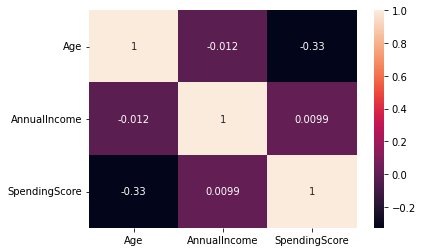

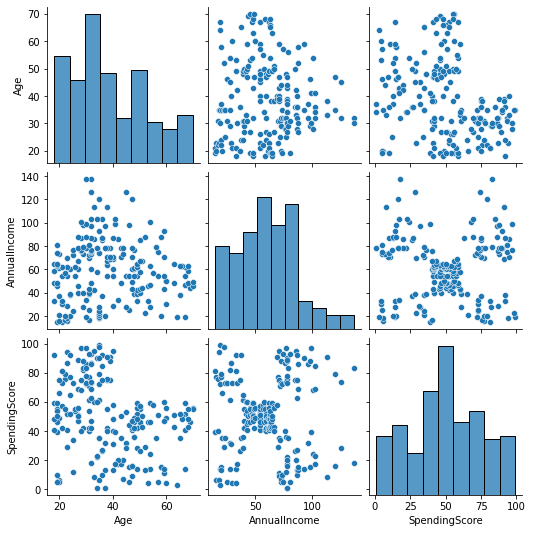

In [50]:
import plotly.express as px
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)
sns.pairplot(df)

In [51]:
model = smf.ols(formula='SpendingScore ~ Gender + Age', data=df).fit()

In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.99
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.22e-05
Time:                        01:07:27   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         74.4089      5.281     14.